In [4]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
def penalty_model(l, x, sigma_l, epsilon, exp):
    num = (1-x)*np.log((1-x)/2)**2+(1+x)*(np.log((1+x)/2))**2
    denom = (1-x)*np.log((1-x)/2)+(1+x)*np.log((1+x)/2)
    penalty = 1-epsilon*x**exp
    return l*penalty*(1-sigma_l**2/(l*penalty)**2*(1+0.5*num/denom))

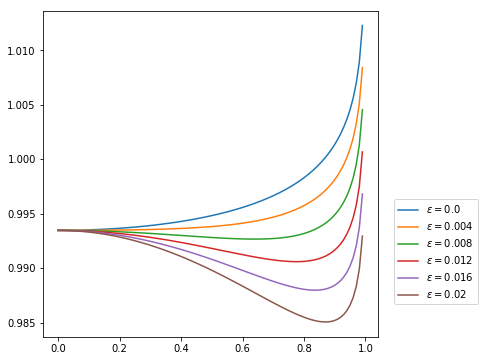

In [45]:
xv=np.linspace(0.0,0.99,100)
epsilonv=np.linspace(0.0,0.02,6)
lambda_stdv=0.1
lv=1.0
expv = 2
fig=plt.figure(figsize=[6,6])
for ind in range(len(epsilonv)):
    plt.plot(xv,penalty_model(lv,xv,lambda_stdv,epsilonv[ind],expv),label=r'$\epsilon={0}$'.format(epsilonv[ind]))
plt.legend(loc=[1.05,0.1])
plt.show()
    

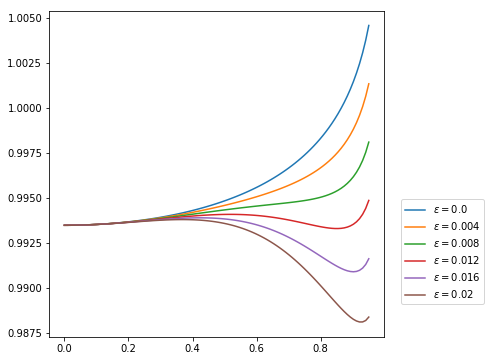

In [40]:
xv=np.linspace(0.0,0.95,100)
epsilonv=np.linspace(0.0,0.02,6)
lambda_stdv=0.1
lv=1.0
expv = 4
fig=plt.figure(figsize=[6,6])
for ind in range(len(epsilonv)):
    plt.plot(xv,penalty_model(lv,xv,lambda_stdv,epsilonv[ind],expv),label=r'$\epsilon={0}$'.format(epsilonv[ind]))
plt.legend(loc=[1.05,0.1])
plt.show()
    

In [28]:
def penalty_model_2(l, x, sigma_l, epsilon1, epsilon2):
    num = (1-x)*np.log((1-x)/2)**2+(1+x)*(np.log((1+x)/2))**2
    denom = (1-x)*np.log((1-x)/2)+(1+x)*np.log((1+x)/2)
    penalty = 1-epsilon1*x**2-epsilon2*x**4
    return l*penalty*(1-sigma_l**2/(l*penalty)**2*(1+0.5*num/denom))

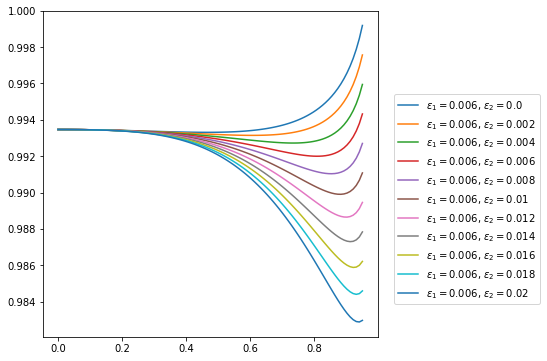

In [36]:
xv=np.linspace(0.0,0.95,100)
epsilonv1=np.linspace(0.0,0.02,11)
epsilonv2=np.linspace(0.0,0.02,11)
lambda_stdv=0.1
lv=1.0
expv = 4
ind1=3
fig=plt.figure(figsize=[6,6])
for ind in range(len(epsilonv2)):
    plt.plot(xv,penalty_model_2(lv,xv,lambda_stdv,epsilonv1[ind1],epsilonv2[ind]),label=r'$\epsilon_1={0}$, $\epsilon_2={1}$'.format(epsilonv1[ind1],epsilonv1[ind]))
plt.legend(loc=[1.05,0.1])
plt.show()
    

In [19]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.linspace(0.0, 0.3, num=16)  # 11
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
x=1-2*beta
alpha = np.linspace(0.0,1.0,11)  # 1
epsilon=np.array([0.0])

num_rep = 100  # number of repeats
# # should give 32000 repeats. Run with 800 job array.
# # should take around 8 hours (480min).49899542
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 13, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), len(epsilon), num_rep]
i0,i1,i2,i3,i4=0,5,1,5,0
par_vals['td_std']=td_std[i0]
par_vals['lambda_std']=lambda_std[i1]
par_vals['r']=beta[i2]/(1-beta[i2])
par_vals['alpha']=alpha[i3]
par_vals['epsilon']=epsilon[i4]
par_vals['exp_n']=2

In [20]:
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=500  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)


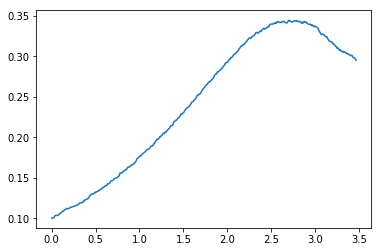

In [21]:
plt.plot(obs[1],obs[9][1])

In [22]:
print 2*1*par_vals['r']/(1+par_vals['r'])

0.10000000000000002


In [32]:
obs[9][0].shape

(901,)

In [50]:
tic=time.clock()
init_pop = g.starting_popn(par_vals)
obs_cum = [[],[]]
par_vals['nstep']=500  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
obs_cum[0]=obs[9][0]
obs_cum[1]=obs[9][1]
for ind in range(10):
    par_vals['nstep']=900  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    obs_cum[0]=np.concatenate((obs_cum[0],obs[9][0]),axis=0)
    obs_cum[1]=np.concatenate((obs_cum[1],obs[9][1]),axis=0)
    print 'Done {0} repeats, Time taken ={1}s'.format(ind, np.around(time.clock()-tic,2))

Done 0 repeats, Time taken =100.14s
Done 1 repeats, Time taken =205.59s
Done 2 repeats, Time taken =366.58s
Done 3 repeats, Time taken =482.94s
Done 4 repeats, Time taken =592.88s
Done 5 repeats, Time taken =682.69s
Done 6 repeats, Time taken =793.81s
Done 7 repeats, Time taken =904.12s
Done 8 repeats, Time taken =1056.42s
Done 9 repeats, Time taken =1214.48s


Text(0.5,0,'Time (in doublings)')

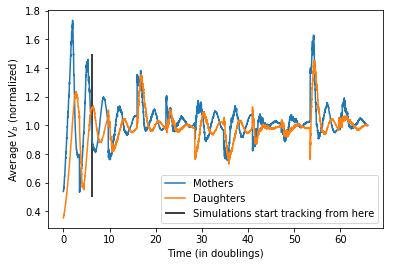

In [52]:
x=np.arange(0,len(obs_cum[0]))*par_vals['dt'] * np.log(2)/par_vals['lambda']
plt.plot(x,obs_cum[0]/obs_cum[0][-1],label='Mothers')
plt.plot(x, obs_cum[1]/obs_cum[1][-1],label='Daughters')
plt.vlines(x=900 * np.log(2)/par_vals['lambda']*par_vals['dt'],ymin=0.5,ymax=1.5,label='Simulations start tracking from here')
plt.legend()
plt.ylabel('Average $V_b$ (normalized)')
plt.xlabel('Time (in doublings)')

In [57]:
temp = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp[0]
print par_vals, 1-2*par_vals['r']/(1+par_vals['r'])

0.9932110483281036
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.052631578947368425, 'delta': 1.0, 'alpha': 0.5, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0} 0.9


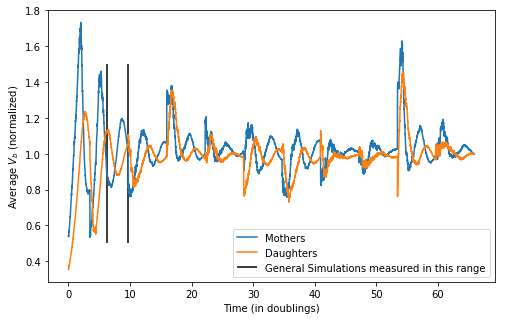

In [61]:
fig=plt.figure(figsize=[8,5])
x=np.arange(0,len(obs_cum[0]))*par_vals['dt'] * np.log(2)/par_vals['lambda']
plt.plot(x,obs_cum[0]/obs_cum[0][-1],label='Mothers')
plt.plot(x, obs_cum[1]/obs_cum[1][-1],label='Daughters')
plt.vlines(x=900 * np.log(2)/par_vals['lambda']*par_vals['dt'],ymin=0.5,ymax=1.5,label='General Simulations measured in this range')
plt.vlines(x=1400 * np.log(2)/par_vals['lambda']*par_vals['dt'],ymin=0.5,ymax=1.5,color='k')
plt.legend()
plt.ylabel('Average $V_b$ (normalized)')
plt.xlabel('Time (in doublings)')
fig.savefig('/mnt/c/Users/felix/Dropbox/19_growth_rate_paper/Figures/Simulation_convergence.png',dpi=300,bbox_inches='tight')

Text(0.5,0,'Time (in $t_d$)')

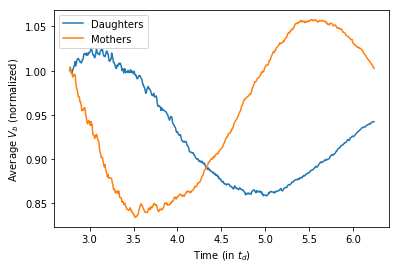

In [29]:
plt.plot(obs[1][400:],obs[9][1][400:]/obs[9][1][400],label='Daughters')
plt.plot(obs[1][400:],obs[9][0][400:]/obs[9][0][400],label='Mothers')
plt.ylabel('Average $V_b$ (normalized)')
plt.legend()
plt.xlabel('Time (in $t_d$)')

In [92]:
i6=0
xv = [obj.vb for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
print np.std(xv)  # vb_std
print np.mean(xv)  # vb_av
yv = [obj.vd for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.linregress(xv, yv)

0.353154444412029
0.020953003893238783


In [93]:
i6=0
xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
print np.std(xv)  # vb_std
print np.mean(xv)  # vb_av
yv = [obj.vd for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.linregress(xv, yv)

0.25000846024607987
0.010745130201660917


In [88]:
i6=0
xv = [obj.vb for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]        
yv = [obj.vd for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.linregress(xv, yv)
print temp[0]

2.0


In [71]:
print par_vals, len(xv)

{'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.01, 'exp_n': 4, 'v_init': 1.0, 'modeltype': 13, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.0, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0} 36125


In [ ]:
(l, x, sigma_l, epsilon, exp)

In [60]:
print par_vals
temp = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp[0]  # GR vol
print penalty_model(par_vals['lambda'], (1-par_vals['r'])/(1+par_vals['r']),par_vals['lambda_std'], par_vals['epsilon'], par_vals['exp_n'])

{'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.01, 'exp_n': 4, 'v_init': 1.0, 'modeltype': 13, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.9775267525012494
0.976891454115463


In [61]:
(1-par_vals['r'])/(1+par_vals['r'])

0.39999999999999997

In [97]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.array([0.1])  # 1
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.1,1.0,10)  # 10
num_rep = 100  # number of repeats 100
epsilon = np.array([0.004])  # 1
exp_n = np.array([2,4]) # 2
# epsilon=np.array([0.0]) # no penalty for now.
# # should give 40000 repeats. Run with 1250 job array.
# # should take around 6 hours (400min).
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 13, 'delta': delta[0], 'lambda': l[0], 'lambda_std': lambda_std[0], 'td_std':td_std[0]}
X = [len(epsilon), len(exp_n), len(beta), len(alpha), num_rep]
temp1 = np.arange(np.prod(X))  # total number of simulations that need doing
output=np.random.permutation(temp1)

In [98]:
temp=[]
for ind in range(10):
    ind1 = np.unravel_index(output[ind],X)  # this is the index in the saved array that we must go through
    par_vals['epsilon'] = epsilon[ind1[0]]
    par_vals['exp_n']=exp_n[ind1[1]]
    par_vals['r']=r[ind1[2]]
    par_vals['alpha']=alpha[ind1[3]]
    # running the actual simulation
    print par_vals
    init_pop = g.starting_popn(par_vals)
    par_vals['nstep']=500  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    par_vals['nstep'] = 900  # now we run this simulation for longer with a better seeded population.
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    for i6 in range(2):
        xv = [obj.vb for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
        yv = [obj.vd for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
        temp.append(scipy.stats.linregress(xv, yv))
        

{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.004, 'delta': 1.0, 'alpha': 0.1, 'dt': 0.01, 'nstep': 900, 'exp_n': 4, 'v_init': 1.0, 'modeltype': 13, 'r': 0.3333333333333333, 'lambda': 1.0}
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.004, 'delta': 1.0, 'alpha': 0.1, 'dt': 0.01, 'nstep': 900, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.6, 'lambda': 1.0}
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.004, 'delta': 1.0, 'alpha': 0.30000000000000004, 'dt': 0.01, 'nstep': 900, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.48148148148148145, 'lambda': 1.0}
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.004, 'delta': 1.0, 'alpha': 0.5, 'dt': 0.01, 'nstep': 900, 'exp_n': 4, 'v_init': 1.0, 'modeltype': 13, 'r': 0.5384615384615384, 'lambda': 1.0}
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.004, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.01, 'nstep': 900, 'exp_n': 4, 'v_init': 1.0, 'modeltype': 13, 'r': 0.9047619047619047, 'lambda': 1.0}
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon